# Concept

```{contents}
:local:
```

In [1]:
from __future__ import annotations

import sys
from pathlib import Path
from typing import Sequence, Optional
import rich
from IPython.display import HTML, display

import math

import matplotlib.pyplot as plt
from IPython.display import display

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

def find_root_dir(current_path: Path | None = None, marker: str = '.git') -> Path | None:
    """
    Find the root directory by searching for a directory or file that serves as a
    marker.

    Parameters
    ----------
    current_path : Path | None
        The starting path to search from. If None, the current working directory
        `Path.cwd()` is used.
    marker : str
        The name of the file or directory that signifies the root.

    Returns
    -------
    Path | None
        The path to the root directory. Returns None if the marker is not found.
    """
    if not current_path:
        current_path = Path.cwd()
    current_path = current_path.resolve()
    for parent in [current_path, *current_path.parents]:
        if (parent / marker).exists():
            return parent
    return None

current_file_path = Path("__file__")
root_dir          = find_root_dir(current_file_path, marker='omnivault')

if root_dir is not None:
    sys.path.append(str(root_dir))
    from omnivault.utils.probability_theory.plot import plot_discrete_uniform_pmf, plot_empirical_discrete_uniform
    from omnivault.utils.visualization.style import use_svg_display
    from omnivault.utils.reproducibility.seed import seed_all
else:
    raise ImportError("Root directory not found.")

use_svg_display()
_ = seed_all(set_torch_deterministic=False)

## PMF and CDF of Discrete Uniform Distribution

```{prf:definition} Discrete Uniform Distribution (PMF)
:label: def_discrete_uniform_pmf

Let $X$ be a **discrete random variable** that follows a Uniform distribution over the set $\S$.
This means that $X=x$ has an equally likely chance of being drawn.

Then the probability mass function (PMF) of $X$ is given by

$$
\P(X=x) = \dfrac{1}{\lvert \S \rvert}
$$

More specifically, if $X$ is a discrete random variable that follows a Uniform distribution
over the ordered set $\S$ where the lower bound is $a$ and the upper bound is $b$,
then the PMF of $X$ is given by

$$
\P(X=x) = \dfrac{1}{b-a+1} \qquad \text{for } x = a, a+1, \ldots, b
$$

Note:

1. It is non-parametric because there are no parameters associated.
```

```{prf:definition} Discrete Uniform Distribution (CDF)
:label: def_discrete_uniform_cdf

The cumulative distribution function (CDF) of a discrete random variable $X$ that follows a Uniform distribution
is given by

$$
\cdf(x) = \P(X \leq x) = \begin{cases}
0 & \text{if } x < a \\
\dfrac{x-a+1}{b-a+1} & \text{if } a \leq x \leq b \\
1 & \text{if } x > b
\end{cases}
$$

where $a$ and $b$ are the lower and upper bounds of the set $\S$.
```

## Plotting PMF and CDF of Poisson Distribution

The below plot shows the PMF and its Empirical Histogram distribution for an
Uniform distribution with $a=1$ and $b=6$, essentially a dice roll.

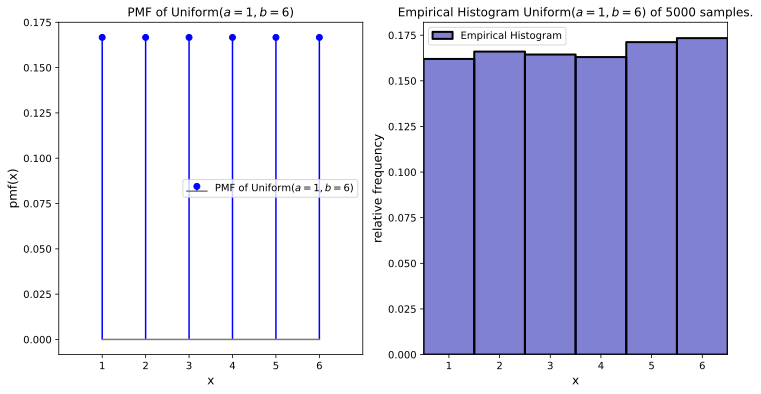

In [2]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6), dpi=125)
low, high = 1, 6  # [1, 6] for dice roll
plot_discrete_uniform_pmf(low, high, fig=fig, ax=axes[0])
plot_empirical_discrete_uniform(low, high, fig=fig, ax=axes[1])
plt.show()